In [2]:
# Import necessary libraries
import pyreadr
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
pandas2ri.activate()
from rpy2.robjects.conversion import localconverter
import plotly.graph_objects as go
import numpy as np
import streamlit as st
from pycirclize import Circos
import matplotlib.pyplot as plt
import seaborn as sns
import liana as li
import scanpy as sc
from anndata import AnnData
import pandas as pd
from liana.mt import rank_aggregate
from liana.method import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean

In [7]:
control_male_8weeks = sc.read_h5ad('../exported_data/pvat_8weeks_control_male.h5ad')
control_male_8weeks

AnnData object with n_obs × n_vars = 6314 × 20743
    obs: 'sample_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'n_genes', 'scDblFinder_score', 'scDblFinder_class', 'Sample', 'tissue', 'diet', 'time', 'sex', 'batch', 'sample_type', 'rat_id', 'weight_3W', 'weight_10W', 'weight_17W', 'weight_24W', 'MAP_7W', 'systolic_bp_7W', 'MAP_9W', 'systolic_bp_9W', 'MAP_16W', 'systolic_bp_16W', 'MAP_24W', 'systolic_bp_24W', 'doublet', 'celltype', 'celltype_broad'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'cellchat_interaction_table_count', 'cellchat_res', 'cellchat_res_filtered', 

In [3]:
control_male_8weeks = sc.read_h5ad('../exported_data/pvat_8weeks_control_male.h5ad')
control_male_8weeks

AnnData object with n_obs × n_vars = 6314 × 20743
    obs: 'sample_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'n_genes', 'scDblFinder_score', 'scDblFinder_class', 'Sample', 'tissue', 'diet', 'time', 'sex', 'batch', 'sample_type', 'rat_id', 'weight_3W', 'weight_10W', 'weight_17W', 'weight_24W', 'MAP_7W', 'systolic_bp_7W', 'MAP_9W', 'systolic_bp_9W', 'MAP_16W', 'systolic_bp_16W', 'MAP_24W', 'systolic_bp_24W', 'doublet', 'celltype', 'celltype_broad'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'cellchat_interaction_table_count', 'cellchat_res', 'cellchat_res_filtered', 

In [4]:
np.unique(control_male_8weeks.obs['celltype_broad'])

array(['Adipocytes', 'Endothelial_Cells', 'Fibroblasts', 'Immune_Cells',
       'Mesothelial_Cells', 'Neuronal_Cells', 'Pericytes', 'SMCs'],
      dtype=object)

In [5]:
# Load RDS file using rpy2, needed for interaction data
filepath = '../figures/exported_results/nichenet/pvat_8weeks_control_male_nichenet.rds'
readRDS = ro.r['readRDS']
pvat_cci = readRDS(filepath)

In [1]:
pvat_cci

NameError: name 'pvat_cci' is not defined

In [6]:
source_labels = ['Adipocytes', 'Endothelial_Cells', 'Fibroblasts', 'Immune_Cells',
       'Mesothelial_Cells', 'Neuronal_Cells', 'Pericytes', 'SMCs']
target_labels = ['Adipocytes', 'Endothelial_Cells', 'Fibroblasts', 'Immune_Cells',
       'Mesothelial_Cells', 'Neuronal_Cells', 'Pericytes', 'SMCs']

In [7]:
cell_pair_interactions = []
for source_cell in source_labels:
    for target_cell in target_labels:
            cell_pair_string = f'{source_cell.replace(" ", "")}2{target_cell.replace(" ", "")}'
            cell_one2cell_two = pvat_cci.rx2(cell_pair_string)
            ligand_receptor = pandas2ri.rpy2py(cell_one2cell_two.rx2('p_ligand_receptor_network'))
            long_format = ligand_receptor.T.stack().reset_index().set_axis('ligand_complex receptor_complex weight'.split(), axis=1)
            long_format['source'] = source_cell
            long_format['target'] = target_cell
        
            cell_pair_interactions.append(long_format)

nichenet_cci = pd.concat(cell_pair_interactions)

In [2]:
nichenet_cci = nichenet_cci[nichenet_cci['weight']>0]
nichenet_cci

NameError: name 'nichenet_cci' is not defined

In [14]:
pd.set_option('display.max_rows', None)
nichenet_cci[(nichenet_cci['source'] == "Adipocytes") & (nichenet_cci['target'] == "Endothelial_Cells")]

,ligand_complex,receptor_complex,weight,source,target
60,Col7a1,Itga1,0.282470,Adipocytes,Endothelial_Cells
61,Col7a1,Itgb1,0.485124,Adipocytes,Endothelial_Cells
124,Col5a3,Itga1,0.516071,Adipocytes,Endothelial_Cells
125,Col5a3,Itgb1,0.485124,Adipocytes,Endothelial_Cells
188,Col5a1,Itga1,0.516071,Adipocytes,Endothelial_Cells
189,Col5a1,Itgb1,0.485124,Adipocytes,Endothelial_Cells
252,Col4a2,Itga1,0.516071,Adipocytes,Endothelial_Cells
253,Col4a2,Itgb1,0.485124,Adipocytes,Endothelial_Cells
316,Col27a1,Itga1,0.282470,Adipocytes,Endothelial_Cells
317,Col27a1,Itgb1,0.265531,Adipocytes,Endothelial_Cells


In [16]:
nichenet_cci
control_male_8weeks.uns['nichenet_lr_res'] = nichenet_cci

In [15]:
control_male_8weeks.write('../exported_data/pvat_8weeks_control_male.h5ad')

## NichetNet Plots

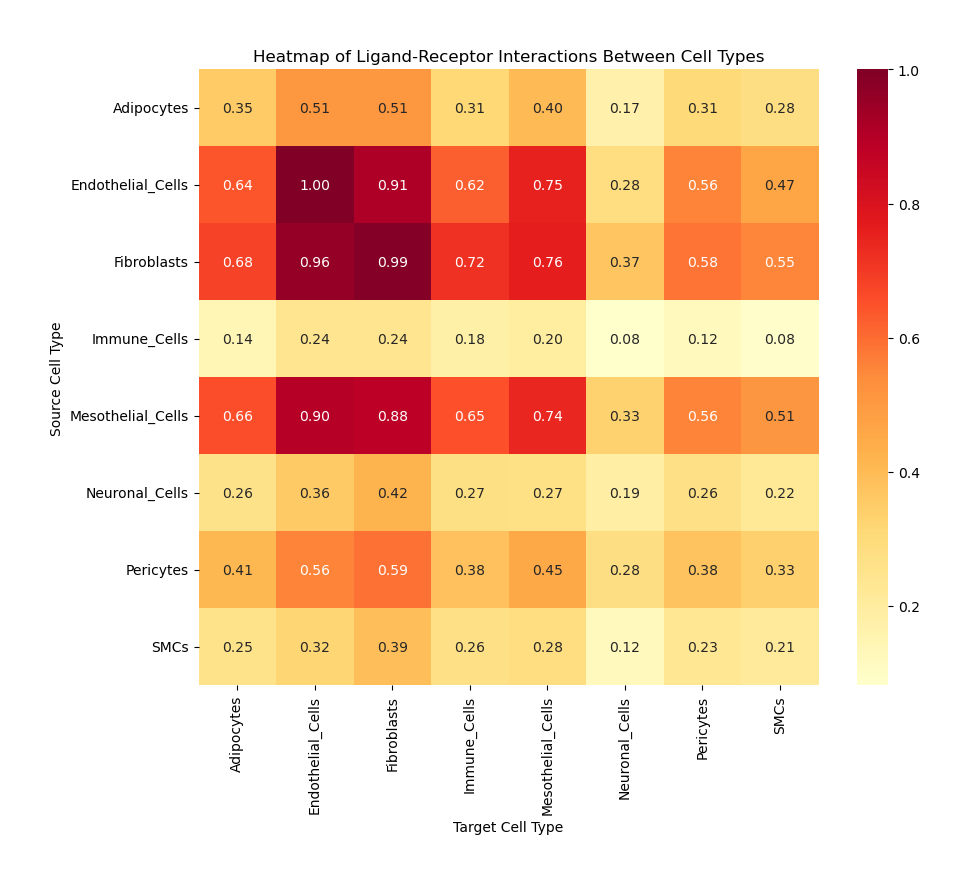

In [16]:
interaction_pivot_table_nichenet = control_male_8weeks.uns['nichenet_lr_res'].groupby(['source', 'target', 'ligand_complex', 'receptor_complex']).size().groupby(['source', 'target']).sum().unstack(fill_value=0)
interaction_pivot_table_nichenet_normalized = interaction_pivot_table_nichenet / interaction_pivot_table_nichenet.max().max()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(interaction_pivot_table_nichenet_normalized, annot=True, cmap="YlOrRd", fmt=".2f", ax=ax)
ax.set_title('Heatmap of Ligand-Receptor Interactions Between Cell Types')
ax.set_ylabel('Source Cell Type')
ax.set_xlabel('Target Cell Type')
plt.show()

In [17]:
control_male_8weeks.uns['nichenet_interaction_table_count'] = interaction_pivot_table_nichenet

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


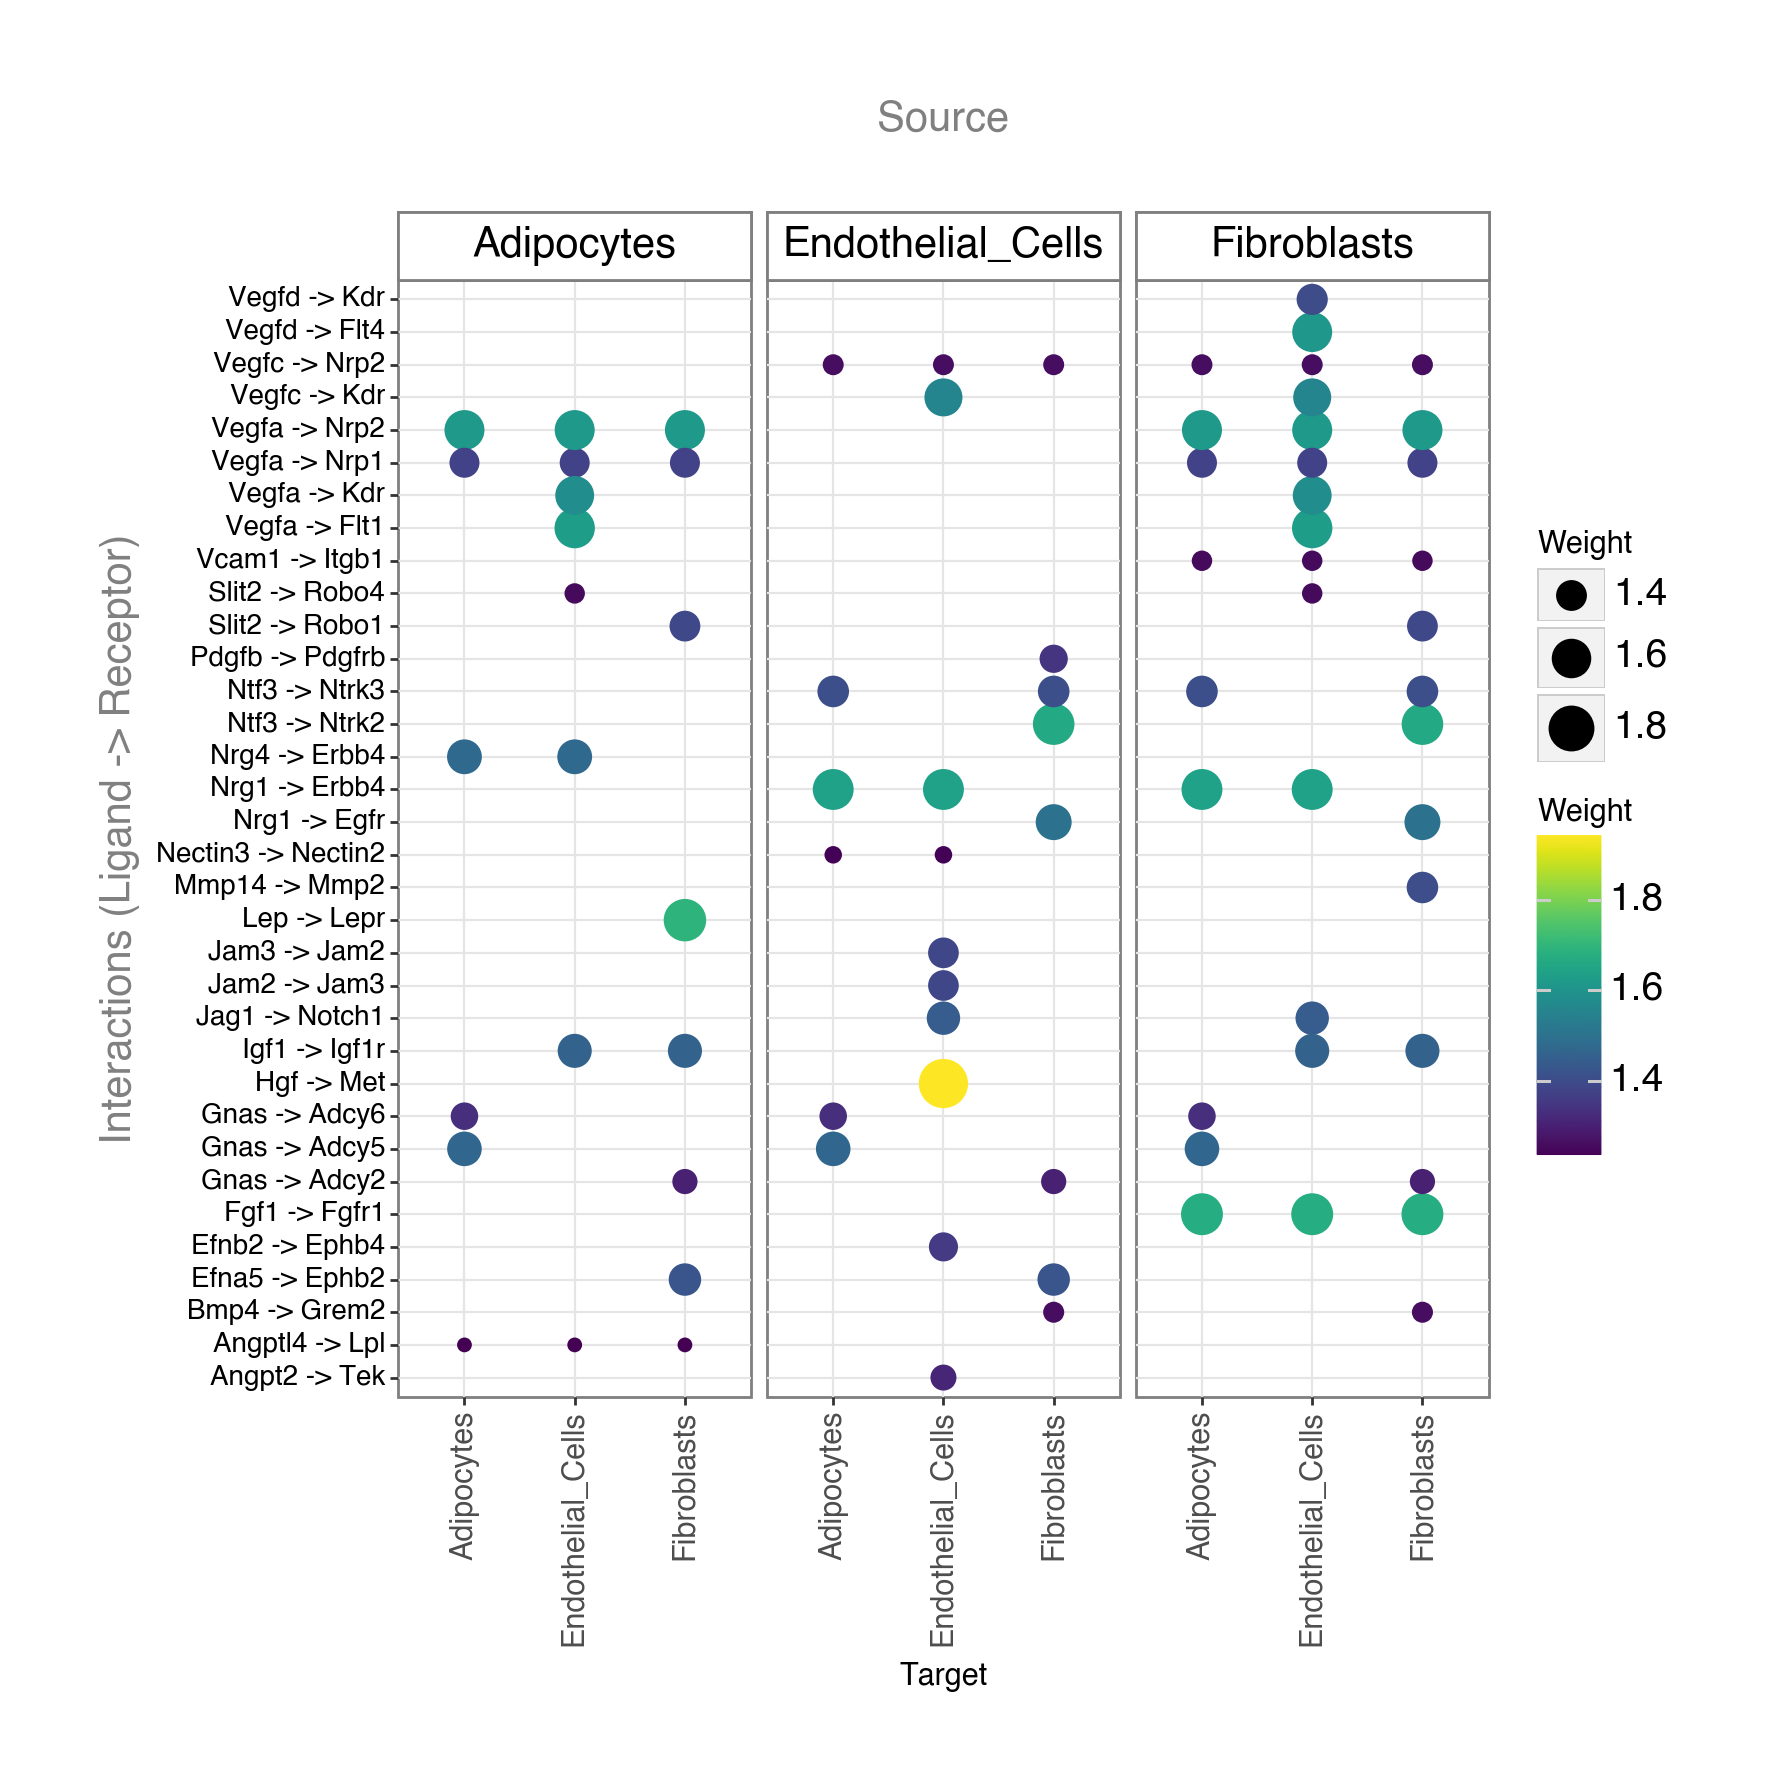

<Figure Size: (800 x 800)>

In [18]:
nichenet_df = control_male_8weeks.uns['nichenet_lr_res']
control_male_8weeks.uns['nichenet_res_filtered'] = nichenet_df[nichenet_df['weight']>1.25]
nichenet_plot = li.pl.dotplot(adata = control_male_8weeks,
              colour='weight',
              size='weight',
              source_labels=['Adipocytes', 'Endothelial_Cells', 'Fibroblasts'],
              target_labels=['Adipocytes', 'Endothelial_Cells', 'Fibroblasts'],
              figure_size=(8, 8),
              uns_key='nichenet_res_filtered' # uns_key to use, default is 'liana_res'
             )
nichenet_plot

## CellChat

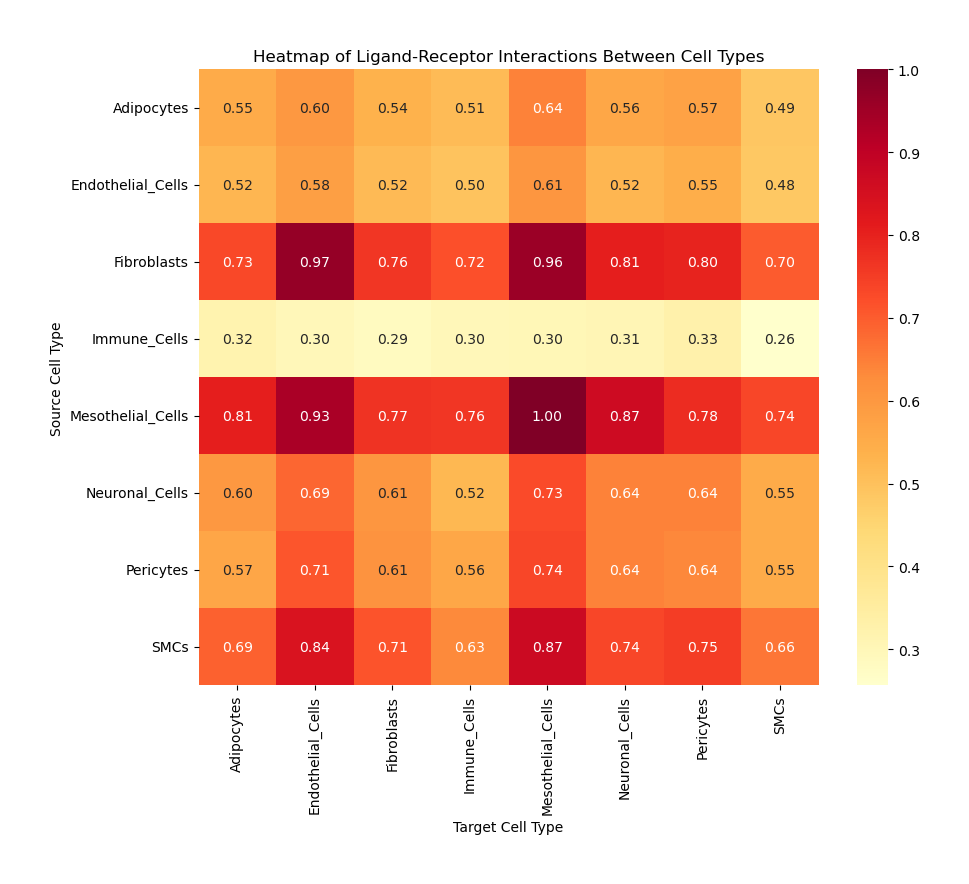

In [19]:
interaction_pivot_table_cellchat = control_male_8weeks.uns['cellchat_res'].groupby(['source', 'target', 'ligand_complex', 'receptor_complex']).size().groupby(['source', 'target']).sum().unstack(fill_value=0)
interaction_pivot_table_cellchat_normalized = interaction_pivot_table_cellchat / interaction_pivot_table_cellchat.max().max()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(interaction_pivot_table_cellchat_normalized, annot=True, cmap="YlOrRd", fmt=".2f", ax=ax)
ax.set_title('Heatmap of Ligand-Receptor Interactions Between Cell Types')
ax.set_ylabel('Source Cell Type')
ax.set_xlabel('Target Cell Type')
plt.show()

In [25]:
cellchat_df = control_male_8weeks.uns['cellchat_res']

pd.set_option('display.max_rows', None)
cellchat_df[(cellchat_df['source'] == "Adipocytes") & (cellchat_df['target'] == "Endothelial_Cells") & (cellchat_df['cellchat_pvals'] <= 0.05)]

,ligand,ligand_complex,ligand_props,ligand_trimean,mat_max,receptor,receptor_complex,receptor_props,receptor_trimean,source,target,lr_probs,cellchat_pvals
1474,Vegfa,Vegfa,0.977831,0.026204,353.0,Kdr,Flt1_Kdr,0.583099,0.003541,Adipocytes,Endothelial_Cells,0.000186,0.000
1466,Efna5,Efna5,0.968857,0.062323,353.0,Epha4,Epha4,0.260563,0.000708,Adipocytes,Endothelial_Cells,0.000088,0.000
1424,Sorbs1,Sorbs1,0.885986,0.012748,353.0,Itga1,Itga1,0.521127,0.002833,Adipocytes,Endothelial_Cells,0.000072,0.000
1403,Vegfa,Vegfa,0.977831,0.026204,353.0,Itgb1,Itgb1,0.401408,0.000708,Adipocytes,Endothelial_Cells,0.000037,0.000
1352,Vegfa,Vegfa,0.977831,0.026204,353.0,Nrp2,Nrp2,0.361972,0.000708,Adipocytes,Endothelial_Cells,0.000037,0.000
1479,Farp2,Farp2,0.575878,0.002833,353.0,Plxna2,Plxna2,0.777465,0.006374,Adipocytes,Endothelial_Cells,0.000036,0.000
1423,Lamc1,Lamc1,0.702560,0.004249,353.0,Itga1,Itga1,0.521127,0.002833,Adipocytes,Endothelial_Cells,0.000024,0.000
1441,Slit3,Slit3,0.873054,0.016289,353.0,Robo4,Robo4,0.254930,0.000708,Adipocytes,Endothelial_Cells,0.000023,0.000
1374,Col4a1,Col4a1,0.857746,0.011331,353.0,Itgb1,Itga1_Itgb1,0.401408,0.000708,Adipocytes,Endothelial_Cells,0.000016,0.000
1382,Col4a2,Col4a2,0.833993,0.009915,353.0,Itgb1,Itga1_Itgb1,0.401408,0.000708,Adipocytes,Endothelial_Cells,0.000014,0.000


In [20]:
control_male_8weeks.uns['cellchat_interaction_table_count'] = interaction_pivot_table_cellchat

In [21]:
interaction_pivot_table_cellchat

target,Adipocytes,Endothelial_Cells,Fibroblasts,Immune_Cells,Mesothelial_Cells,Neuronal_Cells,Pericytes,SMCs
source,,,,,,,,
Adipocytes,134,145,130,124,156,136,139,118
Endothelial_Cells,127,141,125,120,147,127,132,117
Fibroblasts,177,234,185,174,232,195,193,170
Immune_Cells,77,72,69,72,73,74,79,62
Mesothelial_Cells,195,226,186,185,242,210,189,178
Neuronal_Cells,145,166,147,126,176,156,156,134
Pericytes,137,172,148,136,178,156,154,134
SMCs,168,203,173,153,211,178,182,160


Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


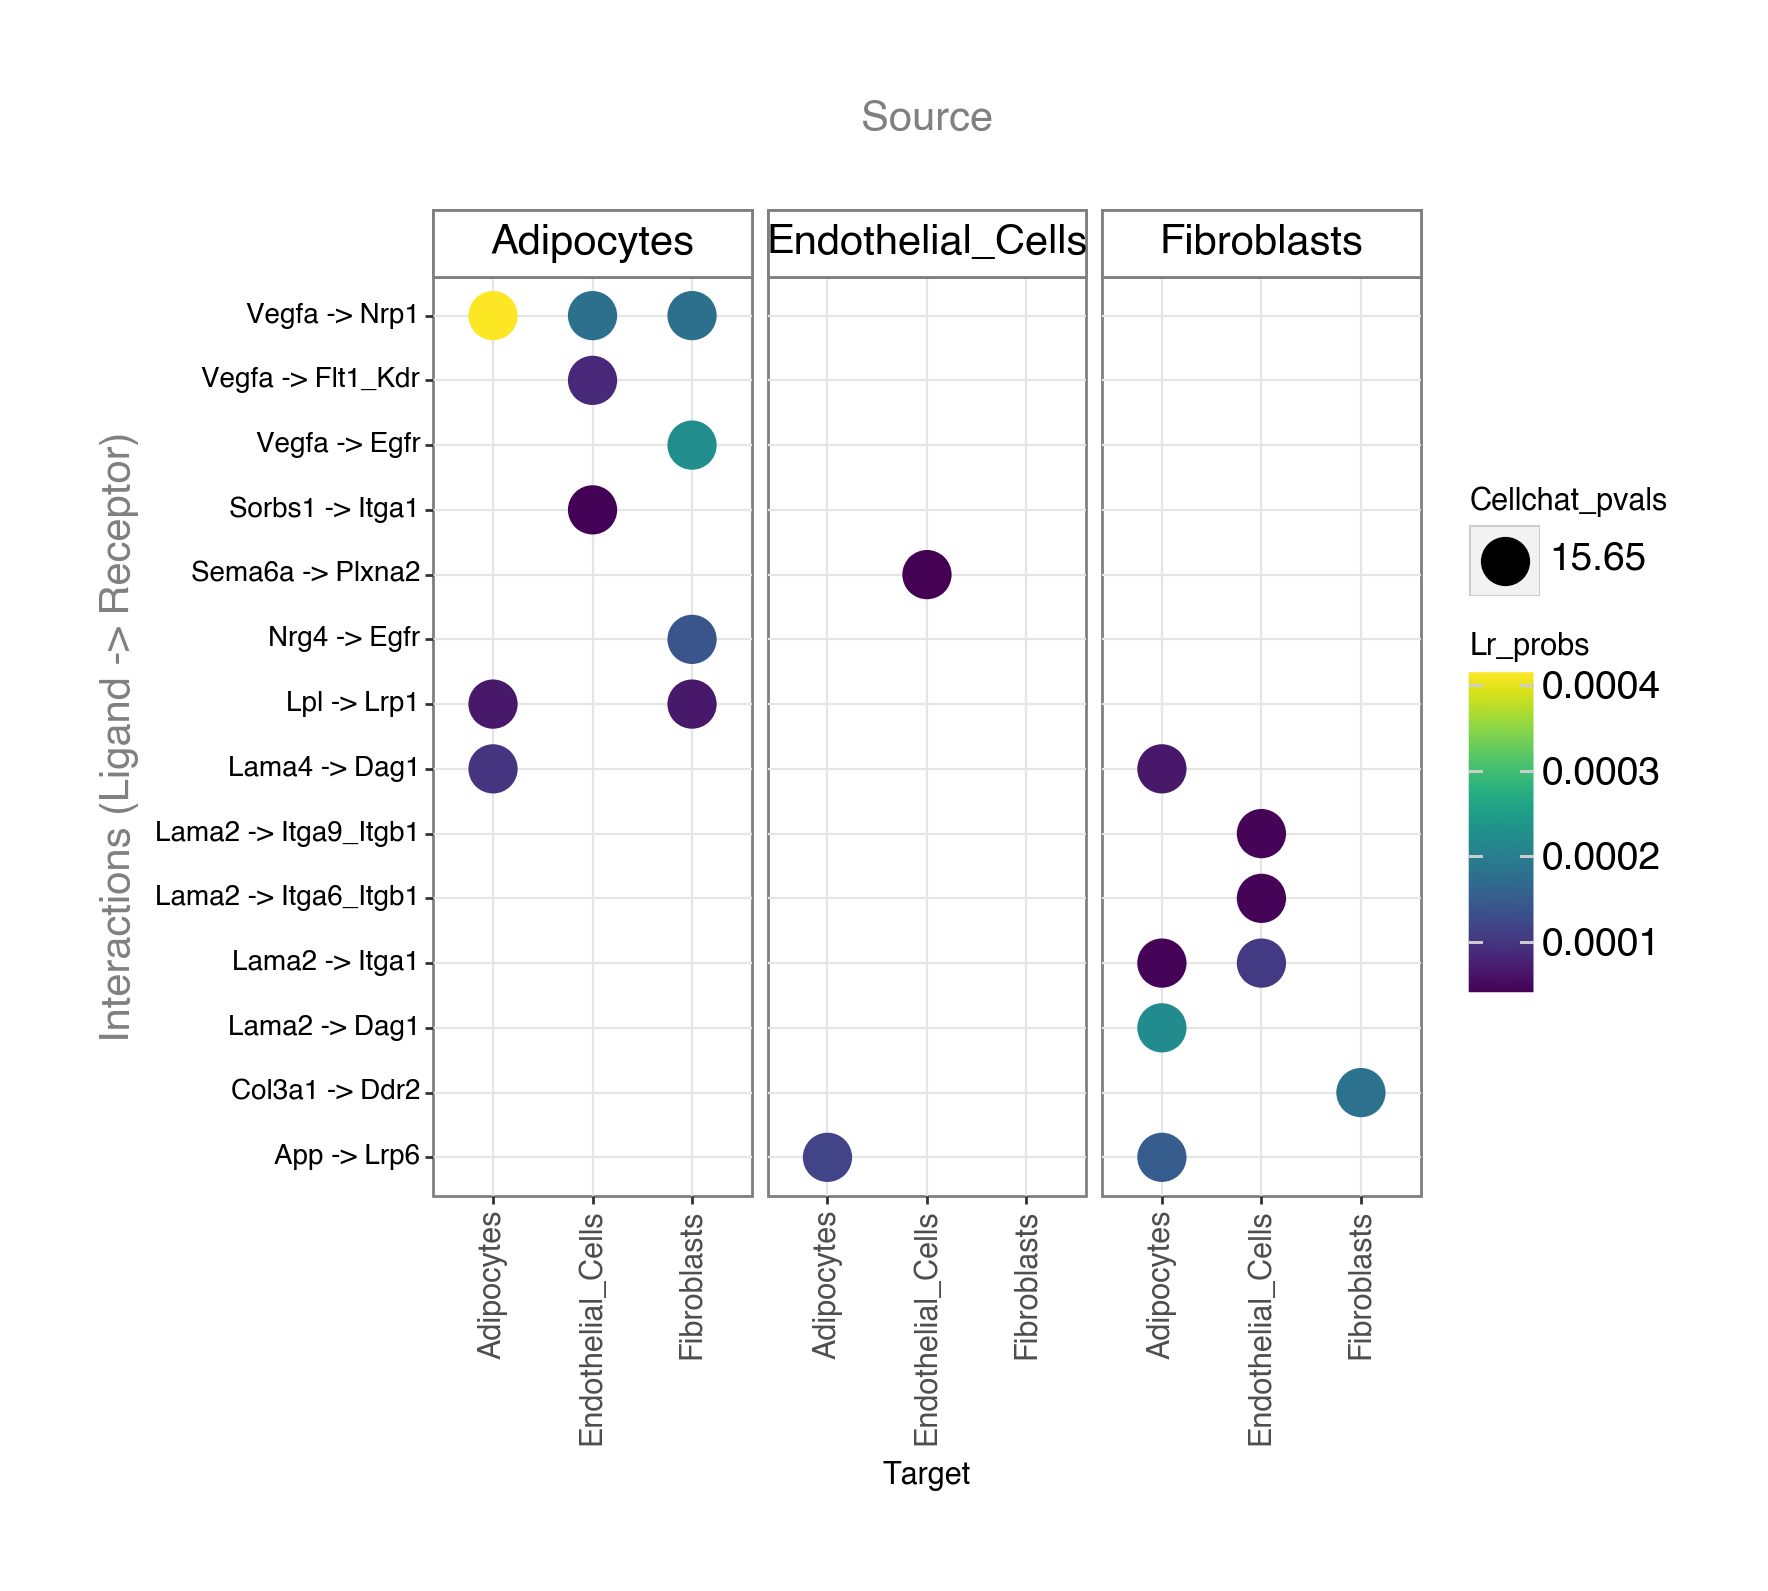

<Figure Size: (800 x 700)>

In [96]:
cellchat_df = control_male_8weeks.uns['cellchat_res']
control_male_8weeks.uns['cellchat_res_filtered'] = cellchat_df[cellchat_df['lr_probs']>0.00005]
cellchat_plot = li.pl.dotplot(adata = control_male_8weeks,
              colour='lr_probs',
              size='cellchat_pvals',
              inverse_size=True, # we inverse sign since we want small p-values to have large sizes
              source_labels=['Adipocytes', 'Endothelial_Cells', 'Fibroblasts'],
              target_labels=['Adipocytes', 'Endothelial_Cells', 'Fibroblasts'],
              figure_size=(8, 7),
              # we filter the pvals column to <= 0.05
              filter_fun=lambda x: x['cellchat_pvals'] <= 0.05,
              uns_key='cellchat_res_filtered' # uns_key to use, default is 'liana_res'
             )
cellchat_plot

## CellPhonedb

In [26]:
cellphone_df = control_male_8weeks.uns['cellphonedb_res']

pd.set_option('display.max_rows', None)
cellphone_df[(cellphone_df['source'] == "Adipocytes") & (cellphone_df['target'] == "Endothelial_Cells") & (cellphone_df['cellphone_pvals'] <= 0.05)]

,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lr_means,cellphone_pvals
1466,Efna5,Efna5,27.131390,0.968857,Epha4,Epha4,0.514085,0.260563,Adipocytes,Endothelial_Cells,13.822738,0.000
1470,Vegfa,Vegfa,9.954510,0.977831,Nrp1,Nrp1,4.733802,0.739437,Adipocytes,Endothelial_Cells,7.344156,0.000
1474,Vegfa,Vegfa,9.954510,0.977831,Kdr,Flt1_Kdr,1.697187,0.583099,Adipocytes,Endothelial_Cells,5.825849,0.000
1519,Gnas,Gnas,10.751834,0.941937,Adcy9,Adcy9,0.254930,0.156338,Adipocytes,Endothelial_Cells,5.503382,0.000
1503,Gnas,Gnas,10.751834,0.941937,Adrb2,Adrb2,0.178873,0.107042,Adipocytes,Endothelial_Cells,5.465353,0.000
1352,Vegfa,Vegfa,9.954510,0.977831,Nrp2,Nrp2,0.876058,0.361972,Adipocytes,Endothelial_Cells,5.415284,0.000
1419,Vegfa,Vegfa,9.954510,0.977831,Itga9,Itga9,0.774648,0.191549,Adipocytes,Endothelial_Cells,5.364579,0.000
1403,Vegfa,Vegfa,9.954510,0.977831,Itgb1,Itgb1,0.663382,0.401408,Adipocytes,Endothelial_Cells,5.308946,0.000
1429,Vegfa,Vegfa,9.954510,0.977831,Itgav,Itgav,0.197183,0.136620,Adipocytes,Endothelial_Cells,5.075847,0.000
1363,Vegfa,Vegfa,9.954510,0.977831,Cd44,Cd44,0.150704,0.109859,Adipocytes,Endothelial_Cells,5.052607,0.000


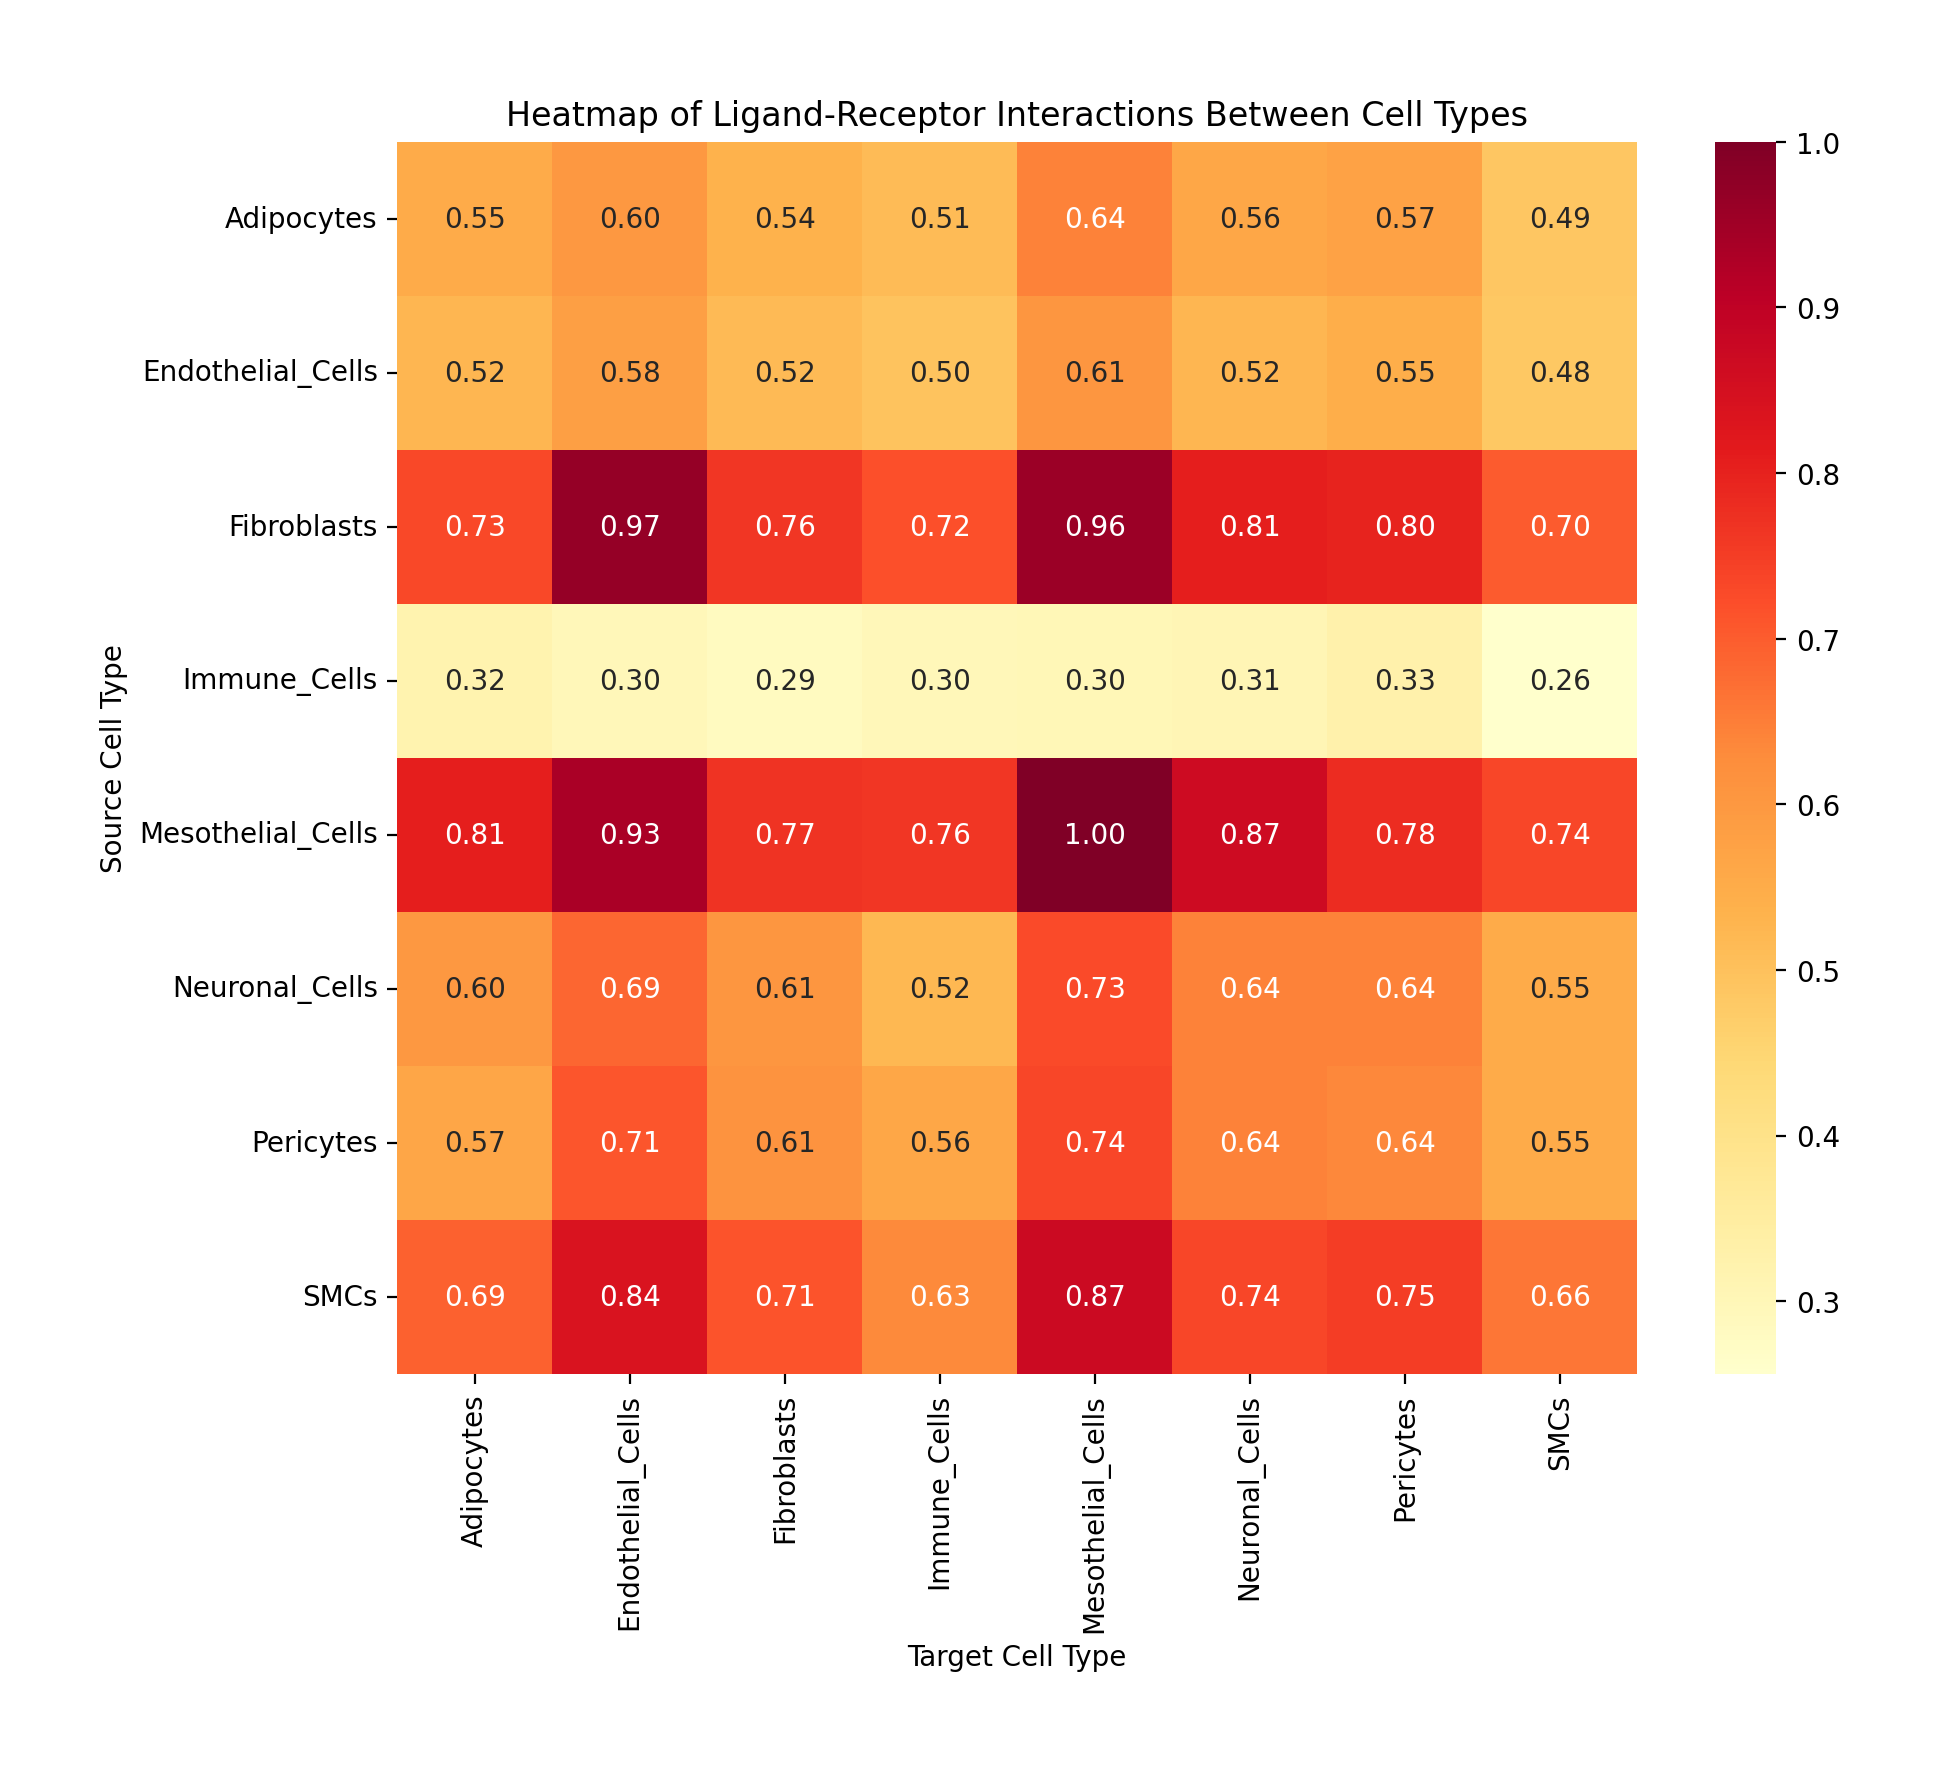

In [21]:
interaction_pivot_table_cellphonedb = control_male_8weeks.uns['cellphonedb_res'].groupby(['source', 'target', 'ligand_complex', 'receptor_complex']).size().groupby(['source', 'target']).sum().unstack(fill_value=0)
interaction_pivot_table_cellphonedb_normalized = interaction_pivot_table_cellphonedb / interaction_pivot_table_cellphonedb.max().max()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(interaction_pivot_table_cellphonedb_normalized, annot=True, cmap="YlOrRd", fmt=".2f", ax=ax)
ax.set_title('Heatmap of Ligand-Receptor Interactions Between Cell Types')
ax.set_ylabel('Source Cell Type')
ax.set_xlabel('Target Cell Type')
plt.show()

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


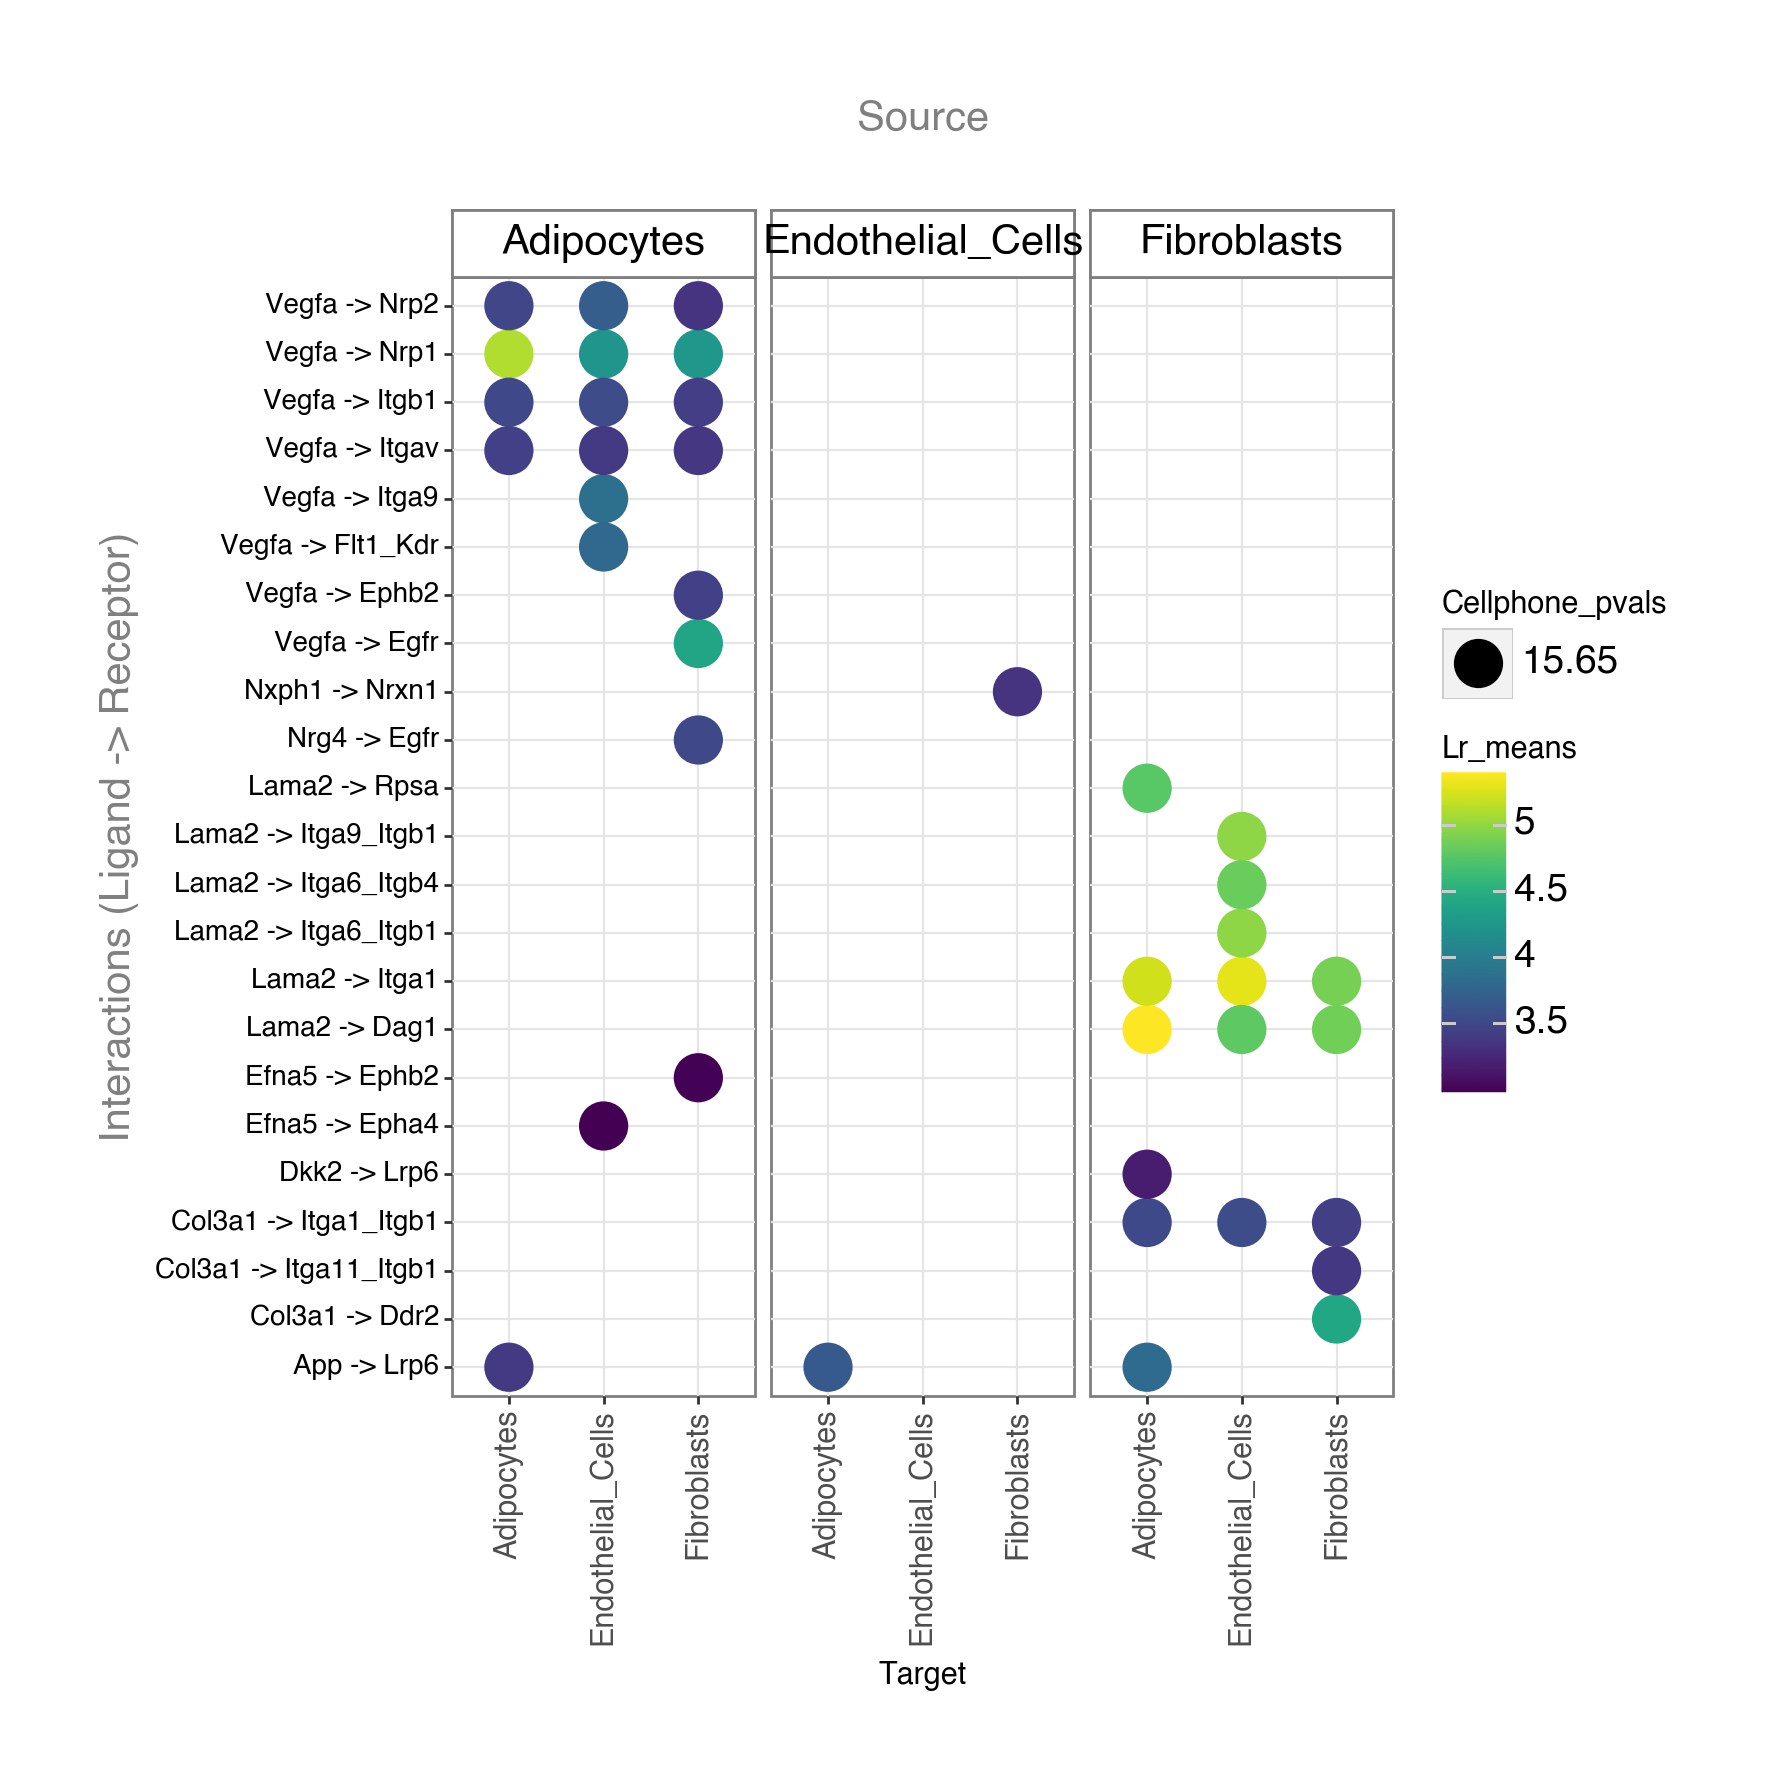

<Figure Size: (800 x 800)>

In [109]:
cellphonedb_db = control_male_8weeks.uns['cellphonedb_res']
control_male_8weeks.uns['cellphonedb_res_filtered'] = cellphonedb_db[cellphonedb_db['lr_means']>3]

li.pl.dotplot(adata = control_male_8weeks,
              colour='lr_means',
              size='cellphone_pvals',
              inverse_size=True, # we inverse sign since we want small p-values to have large sizes
              source_labels=['Adipocytes', 'Endothelial_Cells', 'Fibroblasts'],
              target_labels=['Adipocytes', 'Endothelial_Cells', 'Fibroblasts'],
              figure_size=(8, 8),
              # we filter the pvals column to <= 0.05
              filter_fun=lambda x: x['cellphone_pvals'] <= 0.05,
              uns_key='cellphonedb_res_filtered' # uns_key to use, default is 'liana_res'
             )

In [22]:
control_male_8weeks.uns['cellphonedb_interaction_table_count'] = interaction_pivot_table_cellphonedb

In [23]:
control_male_8weeks.write('../exported_data/pvat_8weeks_control_male.h5ad')